In [17]:
# Homework 1 CLASS-BASED STORAGE 

from docplex.mp.model import Model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [18]:
# Parameters

# Input data from text
C = 3 # Number of classes of product A, B, C

# Input data from csv file
prod_params = pd.read_csv("./product_data.csv", index_col=0)
travel_distance = pd.read_csv("./distances.csv")

d = prod_params['Demand'].values                        # Demand of products
v = prod_params['Value'].transpose().values             # Value of products
ts = travel_distance['distance'].transpose().values     # Travel distance 

N = len(d)      # Type of product in the problem
M = len(ts)     # Number total storage allocations

T = d * v       # Turnover

print(d)
print(v)
print(ts)
print(T)

[20 52  2 10  6  8 11 12 12]
[0.7 2.  0.1 0.2 0.2 0.4 2.  3.  0.1]
[180 178 174 168 160 150 138 124 137 149 159 167 173 177 179 176 172 166
 158 148 136 123 109 122 135 147 157 165 171 175 170 164 156 146 134 121
 108  94 107 120 133 145 155 163 169 162 154 144 132 119 106  93  79  92
 105 118 131 143 153 161 152 142 130 117 104  91  78  64  77  90 103 116
 129 141 151 140 127 114 101  88  75  62  49  61  74  87 100 113 126 139
 128 111  97  84  71  58  47  36  46  57  70  83  96 110 125 115  98  81
  67  54  43  34  25  33  42  53  66  80  95 112 102  85  68  51  39  30
  23  16  22  29  38  50  65  82  99  89  72  55  40  27  19  14   9  13
  18  26  37  52  69  86  76  59  44  31  20  11   7   4   6  10  17  28
  41  56  73  63  48  35  24  15   8   3   1   2   5  12  21  32  45  60]
[ 14.  104.    0.2   2.    1.2   3.2  22.   36.    1.2]


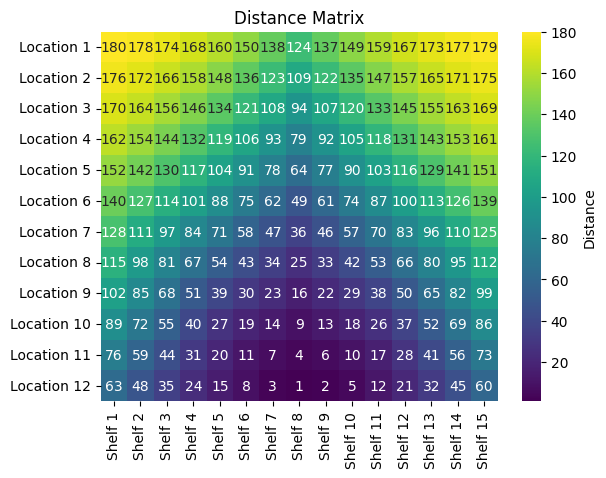

In [19]:
# Distance Matrix

# Convert the distances to a 12x15 matrix
distance_matrix = np.array(ts).reshape((12, 15))

# Create a DataFrame with the distance matrix
distance_df = pd.DataFrame(distance_matrix, columns=[f'Shelf {i + 1}' for i in range(15)], index=[f'Location {13 - i}' for i in range(12, 0, -1)])

# Plot the heatmap
sns.heatmap(distance_df, cmap='viridis', annot=True, fmt="d", cbar_kws={'label': 'Distance'})
plt.title('Distance Matrix')
plt.show()


In [20]:
# Optimization model
mdl = Model('Order picking')

In [21]:
# Absolute turnover values per product in descending order paired with cumulative

# Step 1: Calculate Total Turnover
total_turnover = sum(T)

# Step 2: Calculate Percentage Contribution and Assign Classes
percentage_contributions = [(T[i] / total_turnover) * 100 for i in range(len(T))]

# Step 3: Print Absolute Turnover in Descending Order and Cumulative Percentage
sorted_turnover_indices = sorted(range(len(T)), key=lambda k: T[k], reverse=True)
cumulative_percentage = 0

print("Absolute Turnover\tCumulative Percentage")
print("--------------------------------------------------")
for i in sorted_turnover_indices:
    cumulative_percentage += percentage_contributions[i]
    print(f"{(round(T[i], 2)) }\t\t\t\t{cumulative_percentage:.2f}%")

print("--------------------------------------------------")
print("Total Turnover:",total_turnover)

Absolute Turnover	Cumulative Percentage
--------------------------------------------------
104.0				56.58%
36.0				76.17%
22.0				88.14%
14.0				95.76%
3.2				97.50%
2.0				98.59%
1.2				99.24%
1.2				99.89%
0.2				100.00%
--------------------------------------------------
Total Turnover: 183.8


In [22]:
# Calculate matrix A[p,c] using turnover

'''# Step 1: Calculate Total turnover
total_turnover = sum(T)

# Step 2: Calculate Percentage Contribution and Cumulative Percentage
percentage_contributions = [(T[i] / total_turnover) * 100 for i in range(len(T))]

# Step 3: Sort products in descending order of turnover
sorted_turnover_indices = sorted(range(len(T)), key=lambda k: T[k], reverse=True)
print(sorted_turnover_indices)
cumulative_percentage = 0

# Step 4: Assign Classes (A, B, C) based on Thresholds
class_assignments = []
for i in sorted_turnover_indices:
    cumulative_percentage += percentage_contributions[i]

    if cumulative_percentage <= 80:
        product_class = 'A'
    elif cumulative_percentage <= 95:
        product_class = 'B'
    else:
        product_class = 'C'

    class_assignments.append(product_class)

# Step 5: Update A matrix based on class assignments (binary values)
classes = ['A', 'B', 'C']
A = np.zeros((len(T), len(classes)))

for i in range(len(T)):
    class_index = classes.index(class_assignments[i])
    A[sorted_turnover_indices[i], class_index] = 1  # Set the corresponding class to 1

print(A)
'''

"# Calculate matrix A[p,c] using turnover\n\n# Step 1: Calculate Total turnover\ntotal_turnover = sum(T)\n\n# Step 2: Calculate Percentage Contribution and Cumulative Percentage\npercentage_contributions = [(T[i] / total_turnover) * 100 for i in range(len(T))]\n\n# Step 3: Sort products in descending order of turnover\nsorted_turnover_indices = sorted(range(len(T)), key=lambda k: T[k], reverse=True)\nprint(sorted_turnover_indices)\ncumulative_percentage = 0\n\n# Step 4: Assign Classes (A, B, C) based on Thresholds\nclass_assignments = []\nfor i in sorted_turnover_indices:\n    cumulative_percentage += percentage_contributions[i]\n\n    if cumulative_percentage <= 80:\n        product_class = 'A'\n    elif cumulative_percentage <= 95:\n        product_class = 'B'\n    else:\n        product_class = 'C'\n\n    class_assignments.append(product_class)\n\n# Step 5: Update A matrix based on class assignments (binary values)\nclasses = ['A', 'B', 'C']\nA = np.zeros((len(T), len(classes)))\n\n

In [23]:

# Calculate matrix A[p,c] using demand

# Step 1: Calculate Total Demand
total_demand = sum(d)

# Step 2: Calculate Percentage Contribution and Cumulative Percentage
percentage_contributions_d = [(d[i] / total_demand) * 100 for i in range(len(T))]

# Step 3: Sort products in descending order of demand
sorted_demand_indices = sorted(range(len(d)), key=lambda k: d[k], reverse=True)
print(sorted_demand_indices)
cumulative_percentage = 0

# Step 4: Assign Classes (A, B, C) based on Thresholds
class_assignments = []
for i in sorted_demand_indices:
    cumulative_percentage += percentage_contributions_d[i]

    if cumulative_percentage <= 60:
        product_class = 'A'
    elif cumulative_percentage <= 80:
        product_class = 'B'
    else:
        product_class = 'C'
        
    class_assignments.append(product_class)

# Step 5: Update A matrix based on class assignments (binary values)
classes = ['A', 'B', 'C']
A = np.zeros((len(T), len(classes)))

for i in range(len(T)):
    class_index = classes.index(class_assignments[i])
    A[sorted_demand_indices[i], class_index] = 1  # Set the corresponding class to 1

print(A)



[1, 0, 7, 8, 6, 3, 5, 4, 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [24]:
# Decision variable
x = mdl.binary_var_matrix(M,C,name='x')

In [25]:
# Objective function
mdl.minimize(mdl.sum(mdl.sum(x[l,c]*ts[l] for l in range(M)) * mdl.sum(d[p]* A[p,c] for p in range(N)) for c in range(C)))

In [26]:
# Constraints
for l in range(M):
    mdl.add_constraint(mdl.sum(x[l,c] for c in range(C)) <= 1)

for c in range(C):
    mdl.add_constraint(mdl.sum(d[p]*A[p,c] for p in range(N)) <= mdl.sum(x[l,c] for l in range(M)))

In [27]:
# Solution 
print(mdl.export_to_string())

sol = mdl.solve()

sol.display()

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Order picking

Minimize
 obj: 12960 x_0_0 + 4320 x_0_1 + 6660 x_0_2 + 12816 x_1_0 + 4272 x_1_1
      + 6586 x_1_2 + 12528 x_2_0 + 4176 x_2_1 + 6438 x_2_2 + 12096 x_3_0
      + 4032 x_3_1 + 6216 x_3_2 + 11520 x_4_0 + 3840 x_4_1 + 5920 x_4_2
      + 10800 x_5_0 + 3600 x_5_1 + 5550 x_5_2 + 9936 x_6_0 + 3312 x_6_1
      + 5106 x_6_2 + 8928 x_7_0 + 2976 x_7_1 + 4588 x_7_2 + 9864 x_8_0
      + 3288 x_8_1 + 5069 x_8_2 + 10728 x_9_0 + 3576 x_9_1 + 5513 x_9_2
      + 11448 x_10_0 + 3816 x_10_1 + 5883 x_10_2 + 12024 x_11_0 + 4008 x_11_1
      + 6179 x_11_2 + 12456 x_12_0 + 4152 x_12_1 + 6401 x_12_2 + 12744 x_13_0
      + 4248 x_13_1 + 6549 x_13_2 + 12888 x_14_0 + 4296 x_14_1 + 6623 x_14_2
      + 12672 x_15_0 + 4224 x_15_1 + 6512 x_15_2 + 12384 x_16_0 + 4128 x_16_1
      + 6364 x_16_2 + 11952 x_17_0 + 3984 x_17_1 + 6142 x_17_2 + 11376 x_18_0
      + 3792 x_18_1 + 5846 x_18_2 + 10656 x_19_0 + 3552 x_19_1 + 5476 x_19_2


In [28]:
# Display all the locations used for classes A, B, C
for c in range(len(classes)):
        class_assigned_locations = [l+1 for l in range(M) if sol.get_value(x[l, c]) == 1]
        print(f"Class {classes[c]} Storage Locations: {class_assigned_locations}")

Class A Storage Locations: [68, 82, 83, 84, 95, 96, 97, 98, 99, 100, 101, 109, 110, 111, 112, 113, 114, 115, 116, 117, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
Class B Storage Locations: [8, 22, 24, 36, 40, 41, 49, 50, 56, 57, 63, 64, 72, 73, 77, 78, 88, 89, 91, 92, 104, 105, 106, 120]
Class C Storage Locations: [23, 37, 38, 39, 51, 52, 53, 54, 55, 65, 66, 67, 69, 70, 71, 79, 80, 81, 85, 86, 87, 93, 94, 102, 103, 107, 108, 118, 119, 121, 122, 134, 135, 136, 150, 151, 165]


In [29]:
# Create a list to store the results
result_data = []

# Populate the list with product information and class assignments
for i in sorted_demand_indices:
    result_data.append({
        'Product': f'Product {i + 1}',
        'Turnover': T[i],
        'Percentage Contribution': percentage_contributions[i],
        'Class': class_assignments[sorted_demand_indices.index(i)]
    })

# Create a DataFrame from the list
result_df = pd.DataFrame(result_data)

# Convert the 'Product' column to a numeric type
result_df['Product'] = result_df['Product'].str.extract('(\d+)').astype(int)

# Set the 'Product' column as the index
result_df = result_df.set_index('Product')

# Save the DataFrame to a CSV file
result_df.to_csv('class_assignments.csv')

# Display the final table
print(result_df)

# Create a dictionary to store the assigned storage locations for each class
class_storage_data = {'Class': classes}

# Iterate through classes and products to store assigned locations
for c in range(len(classes)):
    class_assigned_locations = [f'Product {i + 1}' for i in range(len(T)) if A[i, c] == 1]
    print(f"Class {classes[c]} Storage Locations: {class_assigned_locations}")
    class_storage_data[f'Class {classes[c]} Storage Locations'] = str(class_assigned_locations)

         Turnover  Percentage Contribution Class
Product                                         
2           104.0                56.583243     A
1            14.0                 7.616975     A
8            36.0                19.586507     B
9             1.2                 0.652884     B
7            22.0                11.969532     C
4             2.0                 1.088139     C
6             3.2                 1.741023     C
5             1.2                 0.652884     C
3             0.2                 0.108814     C
Class A Storage Locations: ['Product 1', 'Product 2']
Class B Storage Locations: ['Product 8', 'Product 9']
Class C Storage Locations: ['Product 3', 'Product 4', 'Product 5', 'Product 6', 'Product 7']


In [30]:
# Create a list to store the results
result_data = []

# Populate the list with product information and class assignments
cumulative_percentage_demand = 0
for i in sorted_demand_indices:
    product_id = chr(ord('A') + i)  # Convert index to corresponding letter
    cumulative_percentage_demand += percentage_contributions_d[i]
    result_data.append({
        'Product': product_id,
        'Turnover': T[i],
        'Percentage Turnover Contribution': percentage_contributions[i],
        'Demand': d[i],
        'Cumulative Percentage Demand': cumulative_percentage_demand,
        'Class': class_assignments[sorted_demand_indices.index(i)]
    })

# Create a DataFrame from the list
result_df = pd.DataFrame(result_data)

# Set the 'Product' column as the index
result_df = result_df.set_index('Product')

# Display the final table
print(tabulate(result_df, headers='keys', tablefmt='grid'))

# Save the DataFrame to a CSV file
result_df.to_csv('final_table.csv')


+-----------+------------+------------------------------------+----------+--------------------------------+---------+
| Product   |   Turnover |   Percentage Turnover Contribution |   Demand |   Cumulative Percentage Demand | Class   |
+===========+============+====================================+==========+================================+=========+
| B         |      104   |                          56.5832   |       52 |                        39.0977 | A       |
+-----------+------------+------------------------------------+----------+--------------------------------+---------+
| A         |       14   |                           7.61697  |       20 |                        54.1353 | A       |
+-----------+------------+------------------------------------+----------+--------------------------------+---------+
| H         |       36   |                          19.5865   |       12 |                        63.1579 | B       |
+-----------+------------+------------------------------

In [31]:
# Create a dictionary to store the assigned storage locations for each class
class_storage_data = {}

# Find the maximum number of locations assigned to a class
max_locations = max(sum(sol.get_value(x[l, c]) == 1 for l in range(M)) for c in range(len(classes)))

# Iterate through classes and products to store assigned locations
for c in range(len(classes)):
    class_assigned_locations = [l + 1 if sol.get_value(x[l, c]) == 1 else None for l in range(M)]
    # Pad the list to ensure all lists have the same length
    class_assigned_locations += [None] * (max_locations - len(class_assigned_locations))
    print(f"Class {classes[c]} Storage Locations: {class_assigned_locations}")
    class_storage_data[f'Class {classes[c]} Storage Locations'] = class_assigned_locations

# Ensure all lists have the same length by padding with None if needed
max_length = max(len(lst) for lst in class_storage_data.values())
for key, value in class_storage_data.items():
    class_storage_data[key] = value + [None] * (max_length - len(value))

# Create a DataFrame for class storage locations
class_storage_df = pd.DataFrame(class_storage_data)

# Save the DataFrame to a CSV file without the 'Class' column
class_storage_df.to_csv('class_storage_locations.csv', index=False)

Class A Storage Locations: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 68, None, None, None, None, None, None, None, None, None, None, None, None, None, 82, 83, 84, None, None, None, None, None, None, None, None, None, None, 95, 96, 97, 98, 99, 100, 101, None, None, None, None, None, None, None, 109, 110, 111, 112, 113, 114, 115, 116, 117, None, None, None, None, None, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, None, None, None, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, None, None, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, None, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175

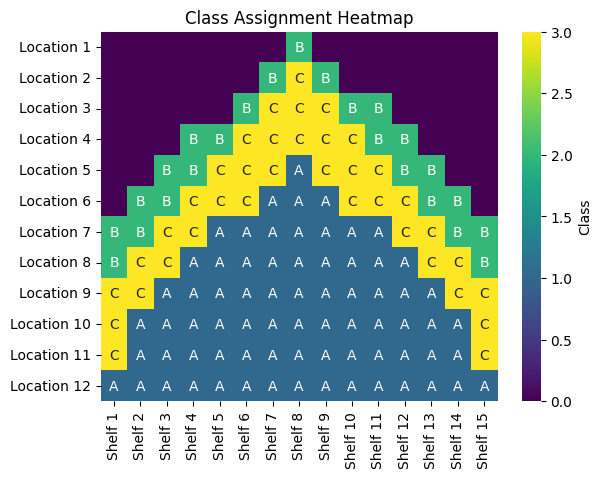

In [32]:
y = np.empty(180, dtype='U1')

for j in range(M):
  
    if sol.get_value(x[j,0]) == 1:
        y[j] = 'A'
    if sol.get_value(x[j,1]) == 1:
        y[j] = 'B'
    if sol.get_value(x[j,2]) == 1:
        y[j] = 'C'
    
# Convert letters to numerical codes
class_codes = pd.Categorical(y).codes

# Reshape the data to a 12x15 matrix
distance_matrix = class_codes.reshape((12, 15))

# Create a DataFrame for the data
distance_df = pd.DataFrame(distance_matrix, columns=[f'Shelf {i + 1}' for i in range(15)],
                           index=[f'Location {13 - i}' for i in range(12, 0, -1)])

# Create a heatmap with Seaborn

sns.heatmap(distance_df, cmap='viridis', annot=y.reshape((12, 15)), fmt='', cbar_kws={'label': 'Class'})
plt.title('Class Assignment Heatmap')
plt.show()